# Process Observation Data Analysis
## The aim of this analysis is to experiment with an alternative approach to analyzing process data that could potentially be more time efficient.

The data structure for the data can be seen in the image below. The observations performed vary in the level of completness as some have been observed more than others, while some have not been observed at all. And for some the sample size is large enough and variance low enough to give confidence that an average is representative of the sample.

![ERD Image](../Data/ERD.jpg)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import seaborn as sns

In [5]:
data_folder = '../Data'
full_path = os.path.join(data_folder, 'ProcessData.xlsx')
excel_file_obj = pd.ExcelFile(full_path)
print('The names of the tabs or sheets in the excel file are as follows: ' ,excel_file_obj.sheet_names)

The names of the tabs or sheets in the excel file are as follows:  ['Iteration 1 Data (2)', 'Iteration 1 Data', 'Iteration 2 Tasks', 'Iteration 2 Session', 'DurationData', 'TaskData', 'RecordingData', 'ProcessData', 'HourlyRates']


From the list of sheets above it is clear that there are some additional unwanted sheets. Upon investigation it looks like the other sheets are templates that were imporoperly deleted and out of best practice we will not be dedicating resources to parsing them.

In [8]:
sheets_to_import = ['DurationData', 'TaskData', 'RecordingData', 'ProcessData', 'HourlyRates']
select_sheets = pd.read_excel(full_path, sheet_name=sheets_to_import)

In [10]:
display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration
225,226,10,521300.0,0:39:55,0:41:43,0 days 00:01:48
30,31,20,5123300.0,01:30:07,01:30:07,0 days 00:00:00
224,225,10,521200.0,0:38:42,0:39:00,0 days 00:00:18
122,123,51,511300.0,01:05:28,01:06:30,0 days 00:01:02
399,400,210,4313600.0,00:14:03,00:24:29,0 days 00:10:26
244,245,51,521200.0,01:53:08,01:53:22,0 days 00:00:14
296,297,80,532100.0,01:22:21,01:23:46,0 days 00:01:25
471,473,130,413100.0,02:17:41,02:23:54,0 days 00:06:13
286,287,80,5122500.0,00:38:07,00:40:05,0 days 00:01:58
71,72,91,5122400.0,00:13:36,00:14:17,0 days 00:00:41


For the DurationData table:
1. The TaskID needs to be fixed and the .0 needs to be removed
2. The Duration needs to be fixed, and the days need to be removed, or recalculate the Duration

In [13]:
select_sheets['DurationData']['TaskID'] = select_sheets['DurationData']['TaskID'].fillna(0).replace([float('inf'), float('-inf')], 0).astype(int)
display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration
471,473,130,413100,02:17:41,02:23:54,0 days 00:06:13
268,269,81,5122500,00:17:17,00:20:10,0 days 00:02:53
60,61,62,5121100,0:36:15,0:38:51,0 days 00:02:36
284,285,80,5122500,00:37:17,00:37:44,0 days 00:00:27
210,211,90,5123300,02:00:49,02:05:54,0 days 00:05:05
472,474,130,413200,02:23:56,02:26:38,0 days 00:02:42
383,384,190,45400,00:04:52,00:06:19,0 days 00:01:27
11,12,11,5121400,00:06:13,00:06:17,0 days 00:00:04
353,354,140,5371400,00:04:51,00:04:56,0 days 00:00:05
498,500,30,5372100,01:00:44,01:01:50,0 days 00:01:06


In [15]:
from datetime import datetime

In [17]:
select_sheets['DurationData']['StartTime'] = pd.to_datetime(select_sheets['DurationData']['StartTime'], format = '%H:%M:%S')
select_sheets['DurationData']['EndTime'] = pd.to_datetime(select_sheets['DurationData']['EndTime'], format = '%H:%M:%S')

select_sheets['DurationData'].loc[:,'Duration 2'] = select_sheets['DurationData']['EndTime'] - select_sheets['DurationData']['StartTime']

display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2
361,362,200,43122200,1900-01-01 00:02:06,1900-01-01 00:02:08,0 days 00:00:02,0 days 00:00:02
213,214,90,5122200,1900-01-01 02:22:02,1900-01-01 02:22:04,0 days 00:00:02,0 days 00:00:02
487,489,130,413200,1900-01-01 02:49:11,1900-01-01 02:50:41,0 days 00:01:30,0 days 00:01:30
3,4,10,5122100,1900-01-01 00:38:42,1900-01-01 00:39:00,0 days 00:00:18,0 days 00:00:18
240,241,61,522300,1900-01-01 01:01:17,1900-01-01 01:05:32,0 days 00:04:15,0 days 00:04:15
64,65,62,5121400,1900-01-01 01:05:06,1900-01-01 01:05:09,0 days 00:00:03,0 days 00:00:03
276,277,80,521600,1900-01-01 00:18:18,1900-01-01 00:24:55,0 days 00:06:37,0 days 00:06:37
455,457,130,413200,1900-01-01 01:41:08,1900-01-01 01:42:43,0 days 00:01:35,0 days 00:01:35
385,386,190,45400,1900-01-01 00:07:04,1900-01-01 00:07:57,0 days 00:00:53,0 days 00:00:53
318,319,80,5122500,1900-01-01 03:13:19,1900-01-01 03:15:39,0 days 00:02:20,0 days 00:02:20


In [19]:
def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

select_sheets['DurationData'].loc[:,'Duration 3'] = select_sheets['DurationData']['Duration 2'].apply(format_timedelta)

display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2,Duration 3
100,101,61,5121400,1900-01-01 01:38:51,1900-01-01 01:39:10,0 days 00:00:19,0 days 00:00:19,00:00:19
435,437,130,413200,1900-01-01 00:59:34,1900-01-01 01:00:37,0 days 00:01:03,0 days 00:01:03,00:01:03
283,284,80,5122500,1900-01-01 00:36:30,1900-01-01 00:37:08,0 days 00:00:38,0 days 00:00:38,00:00:38
161,162,71,5121100,1900-01-01 01:45:31,1900-01-01 01:46:29,0 days 00:00:58,0 days 00:00:58,00:00:58
392,393,210,4313500,1900-01-01 00:07:40,1900-01-01 00:08:13,0 days 00:00:33,0 days 00:00:33,00:00:33
74,75,91,5122500,1900-01-01 00:15:38,1900-01-01 00:16:12,0 days 00:00:34,0 days 00:00:34,00:00:34
400,401,210,4314100,1900-01-01 00:26:30,1900-01-01 00:32:43,0 days 00:06:13,0 days 00:06:13,00:06:13
306,307,80,5122500,1900-01-01 02:05:20,1900-01-01 02:05:32,0 days 00:00:12,0 days 00:00:12,00:00:12
396,397,210,4313500,1900-01-01 00:12:15,1900-01-01 00:12:24,0 days 00:00:09,0 days 00:00:09,00:00:09
251,252,71,522300,1900-01-01 01:47:15,1900-01-01 01:52:28,0 days 00:05:13,0 days 00:05:13,00:05:13


To get the Duration in the right format we had to:
1. Convert the start and end time to datetime (datetime.datetime)
2. Calculate the difference (timedelta object)
3. Convert the start and end time to datetime.time to remove the year
4. Format the timedelta to remove the day count

In [22]:
select_sheets['DurationData']['StartTime'] = select_sheets['DurationData']['StartTime'].dt.time
select_sheets['DurationData']['EndTime'] = select_sheets['DurationData']['EndTime'].dt.time
display(select_sheets['DurationData'].sample(n=10))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2,Duration 3
247,248,51,521300,01:20:42,01:23:57,0 days 00:03:15,0 days 00:03:15,00:03:15
361,362,200,43122200,00:02:06,00:02:08,0 days 00:00:02,0 days 00:00:02,00:00:02
455,457,130,413200,01:41:08,01:42:43,0 days 00:01:35,0 days 00:01:35,00:01:35
267,268,81,5322200,00:08:10,00:17:02,0 days 00:08:52,0 days 00:08:52,00:08:52
24,25,20,5121100,01:22:39,01:22:49,0 days 00:00:10,0 days 00:00:10,00:00:10
219,220,90,5122400,03:30:15,03:30:39,0 days 00:00:24,0 days 00:00:24,00:00:24
417,419,130,413400,00:15:01,00:19:52,0 days 00:04:51,0 days 00:04:51,00:04:51
134,135,51,5122100,01:53:08,01:53:22,0 days 00:00:14,0 days 00:00:14,00:00:14
119,120,51,5121500,00:17:48,00:20:21,0 days 00:02:33,0 days 00:02:33,00:02:33
191,192,50,5121100,03:34:36,03:34:40,0 days 00:00:04,0 days 00:00:04,00:00:04


In [24]:
display(select_sheets['TaskData'].sample(n=10))

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime
10,5121300,Request member/hospital/provider to call back,512,Pre-authorization Agent,0,NaN
49,5361000,Follow up via phone / create Ad hoc letter,536,Case Manager,10,00:00:00
8,5121100,Capture member number on call center enquiries...,512,Pre-authorization Agent,37,00:00:28.459000
220,53842500,Assess request,53842,Case manager,0,NaN
143,5223500,Review service provider quotation,522,Pre-authorization Agent,0,NaN
228,43122100,Select Insurer and type of payment run,43122,BSS Technical Specialist,5,00:00:07.400000
121,52131400,Capture admission auth details,521,Pre-authorization Agent,0,NaN
136,522100,Validate authorisation request,522,Pre-authorization Agent,0,NaN
235,4313300,Cancel the payrun,4313,???,0,NaN
194,5385300,Review BI report,5385,Case manager,0,NaN


For the TaskData table:
1. We need to know up front how many processes we actually observed, then remove all processes that were not observed at least once
2. We need to know the number of iterations observed for each task, as well as how many people were observed. (Group and individualized views)
3. We need all measures of central tendency and either a box plot or scatter plot to get an idea of how times are distributed for each TaskID.
4. Find a relationship between number of iterations or people observed, and how data is distributed (looking at the mean as a proportion of the standard deviation)

In [27]:
display(select_sheets['RecordingData'])

,RecordingID,Recording Length,RecordingDate,PersonObserved,RecordingStatus
0,10.0,00:46:42,28/08/2024,Pauline Jordaan,Processed and Reviewed
1,11.0,00:29:04,28/08/2024,Pauline Jordaan,Processed and Reviewed
2,20.0,03:21:07,28/08/2024,Siyethemba Mkhize,Processed and Reviewed
3,30.0,03:03:36,29/08/2024,Jaqueline Wessels,Processed and Reviewed
4,40.0,00:42:28,02/09/2024,Zoleka Baba,Processed and Reviewed
...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN


For the RecordingData table:
1. The data type for Recording ID needs to be fixed
2. The extra rows need to be removed

In [30]:
print(select_sheets['TaskData'].dtypes)

TaskID              int64
TaskName           object
ProcessID           int64
ResponsibleRole    object
Iterations          int64
AverageTaskTime    object
dtype: object


In [32]:
observedProcesses = select_sheets['TaskData'][select_sheets['TaskData']['Iterations'] > 0]
percentage0bserved = (observedProcesses.shape[0] / select_sheets['TaskData'].shape[0]) * 100
print(f"Out of {select_sheets['TaskData'].shape[0]} total tasks {observedProcesses.shape[0]} have been observed at least once making this {percentage0bserved}%")

Out of 251 total tasks 81 have been observed at least once making this 32.27091633466135%


In [34]:
groupedIterations = select_sheets['TaskData'].groupby('Iterations').size()
dfGroupedIterations = groupedIterations.reset_index(name='Number of Tasks')
display(dfGroupedIterations)

,Iterations,Number of Tasks
0,0,170
1,1,29
2,2,8
3,3,9
4,4,12
5,5,3
6,6,2
7,7,1
8,9,4
9,10,2


In [36]:
print(dfGroupedIterations.dtypes)

Iterations         int64
Number of Tasks    int64
dtype: object


In [38]:
def categorizeNoTasks(x):
    if x==0:
        return '0'
    elif x==1:
        return '1'
    elif x>1 and x<=5:
        return '2-5'
    elif x>5 and x<=15:
        return '6-15'
    else:
        return '15+'

dfGroupedIterations.loc[:,'Categorized Task Count'] = dfGroupedIterations['Iterations'].apply(categorizeNoTasks)

display(dfGroupedIterations)

groupedIterationTasks = dfGroupedIterations.groupby('Categorized Task Count')['Number of Tasks'].sum().reset_index()

display(groupedIterationTasks)

,Iterations,Number of Tasks,Categorized Task Count
0,0,170,0
1,1,29,1
2,2,8,2-5
3,3,9,2-5
4,4,12,2-5
5,5,3,2-5
6,6,2,6-15
7,7,1,6-15
8,9,4,6-15
9,10,2,6-15


,Categorized Task Count,Number of Tasks
0,0,170
1,1,29
2,15+,8
3,2-5,32
4,6-15,12


In [40]:
print(groupedIterationTasks.dtypes)

Categorized Task Count    object
Number of Tasks            int64
dtype: object


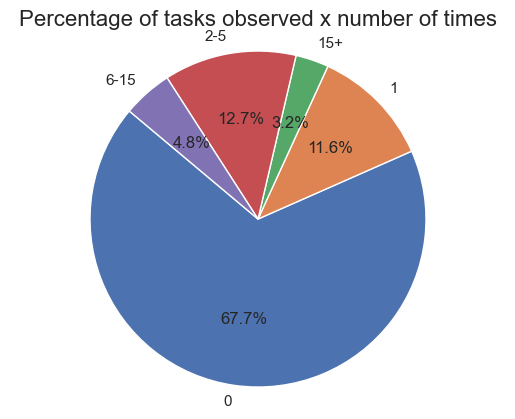

In [42]:
sns.set()

plt.pie(groupedIterationTasks['Number of Tasks'], labels=groupedIterationTasks['Categorized Task Count'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of tasks observed x number of times', fontsize=16)
plt.savefig('../Exports/PercentageTasksXIterations-PieChart.png', format='png', dpi=300)
plt.show()

The chart above makes it clear just how many processes are yet to be observed, and thus quantified. Depending on the threshold set for a task being adequately observed.

In [45]:
display(select_sheets['TaskData'].sample(n=25))

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime
105,521101,Validate authorisation request,521,Case manager,0,NaN
110,5213300,Identify & validate applicable RPL codes,521,Pre-authorization Agent,0,NaN
155,522402,Managed Care / Manage alternative care,522,Hospital,0,NaN
106,521200,Validate membership,521,Pre-authorization Agent,9,00:01:23.111000
59,5322400,Issue weekly report via email,5322,Case manager,0,NaN
62,5324200,Liaise with multi-disciplinary team (funder & ...,5324,Case manager,0,NaN
246,521200,Validate membership,521,Pre-authorization Agent,9,00:01:23.111000
54,539500,Update PMB benefit indicator on the authorisat...,539,PMB Team/Case Manager,0,NaN
188,5383300,Request motivation letter,5383,Case manager,1,00:00:00
232,43122500,Distribute payrun report,43122,BSS Technical Specialist,4,00:00:09.750000


In [47]:
print(select_sheets['DurationData'].dtypes)

DurationID               int64
RecordingID              int64
TaskID                   int32
StartTime               object
EndTime                 object
Duration       timedelta64[ns]
Duration 2     timedelta64[ns]
Duration 3              object
dtype: object


In [49]:
display(select_sheets['DurationData'].sample(n=25))

,DurationID,RecordingID,TaskID,StartTime,EndTime,Duration,Duration 2,Duration 3
402,403,210,4314300,00:49:13,00:49:21,0 days 00:00:08,0 days 00:00:08,00:00:08
506,508,30,522700,01:19:58,01:20:47,0 days 00:00:49,0 days 00:00:49,00:00:49
449,451,130,413200,01:29:57,01:31:26,0 days 00:01:29,0 days 00:01:29,00:01:29
324,325,80,5322300,03:22:40,03:34:13,0 days 00:11:33,0 days 00:11:33,00:11:33
453,455,130,413100,01:36:21,01:37:15,0 days 00:00:54,0 days 00:00:54,00:00:54
26,27,20,5122100,01:22:56,01:22:58,0 days 00:00:02,0 days 00:00:02,00:00:02
94,95,61,5121100,01:30:46,01:31:06,0 days 00:00:20,0 days 00:00:20,00:00:20
259,260,90,521200,02:22:02,02:31:04,0 days 00:09:02,0 days 00:09:02,00:09:02
412,413,130,413200,00:04:19,00:06:25,0 days 00:02:06,0 days 00:02:06,00:02:06
356,357,140,5371600,00:06:34,00:06:39,0 days 00:00:05,0 days 00:00:05,00:00:05


A few things need to be done for the duration data:
1. The required duration data need to be stored in a new dataframe
2. The duration needs to be converted to timedelta to make future operations possible

Then for the task data:
1. All times with more than 1 iterations need to be selected into a new dataframe
2. Then all measures of central tendency need to be calculated for these task durations
3. Then box plots for these tasks

In [52]:
durationData = select_sheets['DurationData'][['RecordingID','TaskID','Duration 3']]
display(durationData)

,RecordingID,TaskID,Duration 3
0,10,5121100,00:00:20
1,10,5121200,00:00:16
2,10,5121400,00:00:55
3,10,5122100,00:00:18
4,10,5122200,00:00:15
...,...,...,...
520,30,5371600,00:00:06
521,30,5381200,00:01:48
522,30,5381300,00:08:06
523,30,53841700,00:06:32


In [54]:
durationData.loc[:,'Duration 3'] = pd.to_timedelta(durationData['Duration 3'])
display(durationData)

,RecordingID,TaskID,Duration 3
0,10,5121100,0 days 00:00:20
1,10,5121200,0 days 00:00:16
2,10,5121400,0 days 00:00:55
3,10,5122100,0 days 00:00:18
4,10,5122200,0 days 00:00:15
...,...,...,...
520,30,5371600,0 days 00:00:06
521,30,5381200,0 days 00:01:48
522,30,5381300,0 days 00:08:06
523,30,53841700,0 days 00:06:32


In [56]:
taskData = select_sheets['TaskData'][select_sheets['TaskData']['Iterations'] > 1]
display(taskData)

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime
3,511400,Perform mock claims and apply claiming rules,511,Claims Technical Specialist,4,00:11:41.500000
4,511500,Email excel quote,511,Claims Technical Specialist,4,00:05:38.250000
8,5121100,Capture member number on call center enquiries...,512,Pre-authorization Agent,37,00:00:28.459000
9,5121200,Review consent form and dependent's ID number,512,Pre-authorization Agent,4,00:00:16.750000
11,5121400,Capture call related to info (member / dependent),512,Pre-authorization Agent,28,00:00:19.464000
12,5121500,Resolve enquiry,512,Pre-authorization Agent,34,00:01:31.735000
13,5122100,Capture and validate member number,512,Pre-authorization Agent,22,00:00:34.955000
14,5122200,Select the required dependent,512,Pre-authorization Agent,11,00:00:52.545000
15,5122300,Select Create,512,Pre-authorization Agent,12,00:00:24.667000
16,5122400,Capture auth details and click OK,512,Pre-authorization Agent,19,00:01:30.211000


In [68]:
durationData.rename(columns={'Duration 3': 'Duration'}, inplace=True)
display(durationData)

C:\Users\User\AppData\Local\Temp\ipykernel_18780\1285653903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durationData.rename(columns={'Duration 3': 'Duration'}, inplace=True)


,RecordingID,TaskID,Duration
0,10,5121100,0 days 00:00:20
1,10,5121200,0 days 00:00:16
2,10,5121400,0 days 00:00:55
3,10,5122100,0 days 00:00:18
4,10,5122200,0 days 00:00:15
...,...,...,...
520,30,5371600,0 days 00:00:06
521,30,5381200,0 days 00:01:48
522,30,5381300,0 days 00:08:06
523,30,53841700,0 days 00:06:32


Since the above doesn't work, we'll have to convert the duration to seconds and back. 

In [68]:
durationData.loc[:,'Duration'] = pd.to_timedelta(durationData['Duration 3'])
durationData.loc[:,'Duration Seconds'] = durationData['Duration'].dt.total_seconds()
display(durationData)

C:\Users\User\AppData\Local\Temp\ipykernel_6872\239436355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durationData.loc[:,'Duration'] = pd.to_timedelta(durationData['Duration 3'])
C:\Users\User\AppData\Local\Temp\ipykernel_6872\239436355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durationData.loc[:,'Duration Seconds'] = durationData['Duration'].dt.total_seconds()


,RecordingID,TaskID,Duration 3,Duration,Duration Seconds
0,10,5121100,0 days 00:00:20,0 days 00:00:20,20.0
1,10,5121200,0 days 00:00:16,0 days 00:00:16,16.0
2,10,5121400,0 days 00:00:55,0 days 00:00:55,55.0
3,10,5122100,0 days 00:00:18,0 days 00:00:18,18.0
4,10,5122200,0 days 00:00:15,0 days 00:00:15,15.0
...,...,...,...,...,...
520,30,5371600,0 days 00:00:06,0 days 00:00:06,6.0
521,30,5381200,0 days 00:01:48,0 days 00:01:48,108.0
522,30,5381300,0 days 00:08:06,0 days 00:08:06,486.0
523,30,53841700,0 days 00:06:32,0 days 00:06:32,392.0


In [70]:
display(durationData)

,RecordingID,TaskID,Duration 3,Duration,Duration Seconds
0,10,5121100,0 days 00:00:20,0 days 00:00:20,20.0
1,10,5121200,0 days 00:00:16,0 days 00:00:16,16.0
2,10,5121400,0 days 00:00:55,0 days 00:00:55,55.0
3,10,5122100,0 days 00:00:18,0 days 00:00:18,18.0
4,10,5122200,0 days 00:00:15,0 days 00:00:15,15.0
...,...,...,...,...,...
520,30,5371600,0 days 00:00:06,0 days 00:00:06,6.0
521,30,5381200,0 days 00:01:48,0 days 00:01:48,108.0
522,30,5381300,0 days 00:08:06,0 days 00:08:06,486.0
523,30,53841700,0 days 00:06:32,0 days 00:06:32,392.0


In [78]:
def q1(x):
   return x.quantile(0.25)

def q3(x):
   return x.quantile(0.75) 

#durationStats = durationData.groupby('TaskID')['Duration Seconds'].agg(['mean', 'min', 'max', 'std','median']).reset_index()

durationStats = durationData.groupby('TaskID')['Duration Seconds'].agg( mean='mean', min='min', max='max', std='std', median='median', q1=q1, q3=q3 ).reset_index()

display(durationStats)

,TaskID,mean,min,max,std,median,q1,q3
0,0,22.000000,22.0,22.0,NaN,22.0,22.00,22.00
1,45400,106.333333,53.0,179.0,65.186911,87.0,70.00,133.00
2,45500,34.333333,18.0,47.0,14.843629,38.0,28.00,42.50
3,45600,14.000000,14.0,14.0,NaN,14.0,14.00,14.00
4,45700,120.000000,120.0,120.0,NaN,120.0,120.00,120.00
...,...,...,...,...,...,...,...,...
77,53841100,51.000000,51.0,51.0,NaN,51.0,51.00,51.00
78,53841200,15.000000,15.0,15.0,NaN,15.0,15.00,15.00
79,53841600,259.500000,114.0,405.0,205.768073,259.5,186.75,332.25
80,53841700,392.000000,392.0,392.0,NaN,392.0,392.00,392.00


In [80]:
display(durationStats.dtypes)

TaskID      int32
mean      float64
min       float64
max       float64
std       float64
median    float64
q1        float64
q3        float64
dtype: object

In [82]:
taskDataXAgg = pd.merge(taskData, durationStats, on='TaskID')
display(taskDataXAgg)

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
0,511400,Perform mock claims and apply claiming rules,511,Claims Technical Specialist,4,00:11:41.500000,701.500000,371.0,927.0,235.351510,754.0,645.50,810.00
1,511500,Email excel quote,511,Claims Technical Specialist,4,00:05:38.250000,338.250000,252.0,474.0,103.590138,313.5,260.25,391.50
2,5121100,Capture member number on call center enquiries...,512,Pre-authorization Agent,37,00:00:28.459000,28.459459,0.0,156.0,35.041717,13.0,8.00,52.00
3,5121200,Review consent form and dependent's ID number,512,Pre-authorization Agent,4,00:00:16.750000,16.750000,7.0,23.0,7.135592,18.5,13.75,21.50
4,5121400,Capture call related to info (member / dependent),512,Pre-authorization Agent,28,00:00:19.464000,19.464286,3.0,72.0,16.943221,12.0,8.50,26.50
5,5121500,Resolve enquiry,512,Pre-authorization Agent,34,00:01:31.735000,91.735294,0.0,405.0,95.498472,62.5,23.25,136.75
6,5122100,Capture and validate member number,512,Pre-authorization Agent,22,00:00:34.955000,34.954545,2.0,268.0,54.273099,21.0,13.25,37.50
7,5122200,Select the required dependent,512,Pre-authorization Agent,11,00:00:52.545000,52.545455,1.0,466.0,137.476808,11.0,2.50,21.00
8,5122300,Select Create,512,Pre-authorization Agent,12,00:00:24.667000,24.666667,0.0,130.0,37.533823,7.0,0.75,37.25
9,5122400,Capture auth details and click OK,512,Pre-authorization Agent,19,00:01:30.211000,90.210526,15.0,326.0,90.495291,61.0,23.50,126.50


In [84]:
display(durationData)

,RecordingID,TaskID,Duration 3,Duration,Duration Seconds
0,10,5121100,0 days 00:00:20,0 days 00:00:20,20.0
1,10,5121200,0 days 00:00:16,0 days 00:00:16,16.0
2,10,5121400,0 days 00:00:55,0 days 00:00:55,55.0
3,10,5122100,0 days 00:00:18,0 days 00:00:18,18.0
4,10,5122200,0 days 00:00:15,0 days 00:00:15,15.0
...,...,...,...,...,...
520,30,5371600,0 days 00:00:06,0 days 00:00:06,6.0
521,30,5381200,0 days 00:01:48,0 days 00:01:48,108.0
522,30,5381300,0 days 00:08:06,0 days 00:08:06,486.0
523,30,53841700,0 days 00:06:32,0 days 00:06:32,392.0


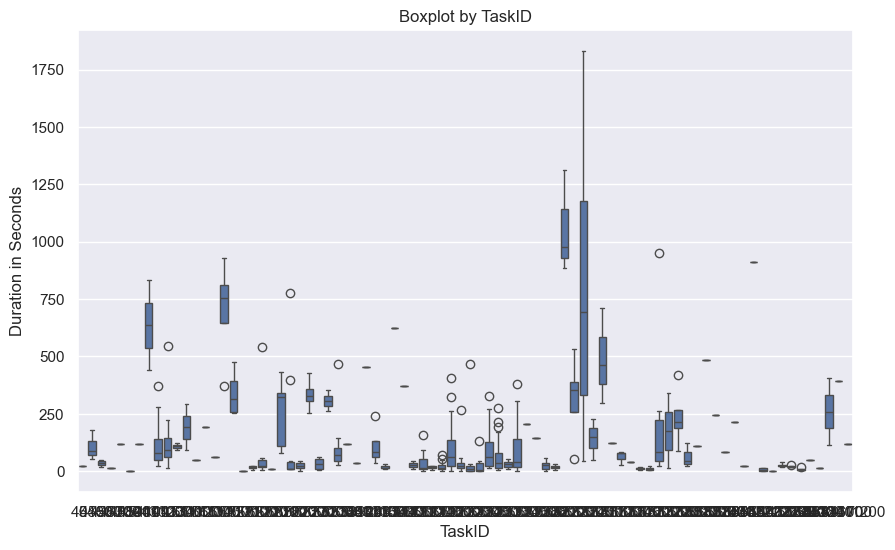

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TaskID', y='Duration Seconds', data=durationData)
plt.title('Boxplot by TaskID')
plt.xlabel('TaskID')
plt.ylabel('Duration in Seconds')
plt.show()

This boxplot is too crowded, the tasks will be displayed individually.

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
2,5121100,Capture member number on call center enquiries...,512,Pre-authorization Agent,37,00:00:28.459000,28.459459,0.0,156.0,35.041717,13.0,8.0,52.0


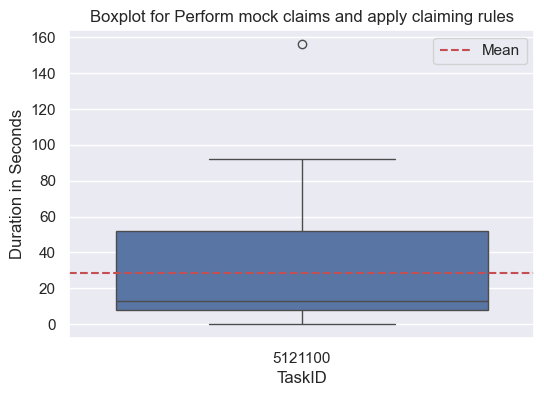

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
3,5121200,Review consent form and dependent's ID number,512,Pre-authorization Agent,4,00:00:16.750000,16.75,7.0,23.0,7.135592,18.5,13.75,21.5


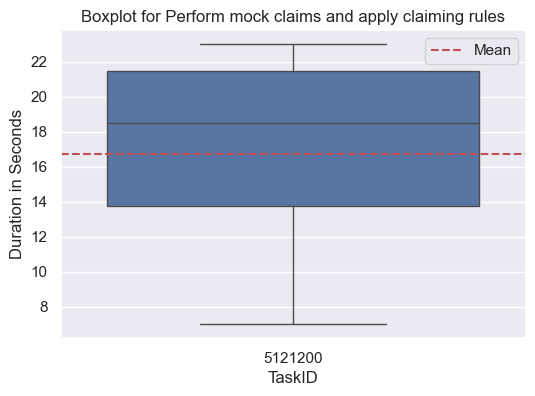

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
4,5121400,Capture call related to info (member / dependent),512,Pre-authorization Agent,28,00:00:19.464000,19.464286,3.0,72.0,16.943221,12.0,8.5,26.5


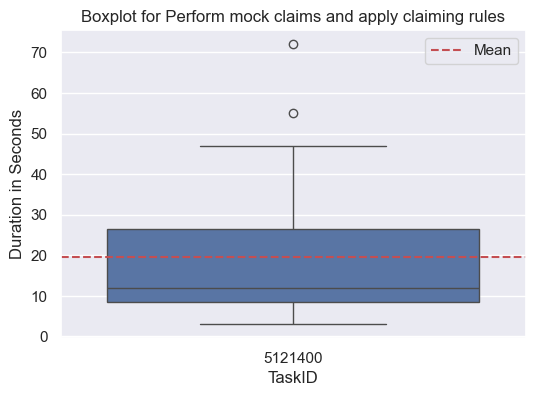

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
6,5122100,Capture and validate member number,512,Pre-authorization Agent,22,00:00:34.955000,34.954545,2.0,268.0,54.273099,21.0,13.25,37.5


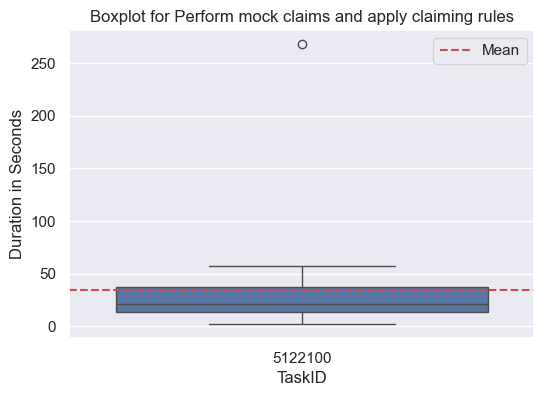

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
7,5122200,Select the required dependent,512,Pre-authorization Agent,11,00:00:52.545000,52.545455,1.0,466.0,137.476808,11.0,2.5,21.0


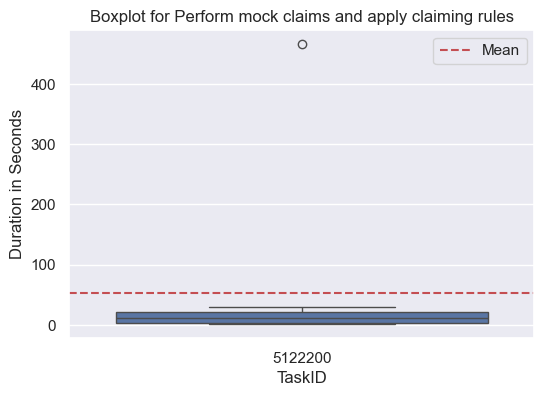

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
8,5122300,Select Create,512,Pre-authorization Agent,12,00:00:24.667000,24.666667,0.0,130.0,37.533823,7.0,0.75,37.25


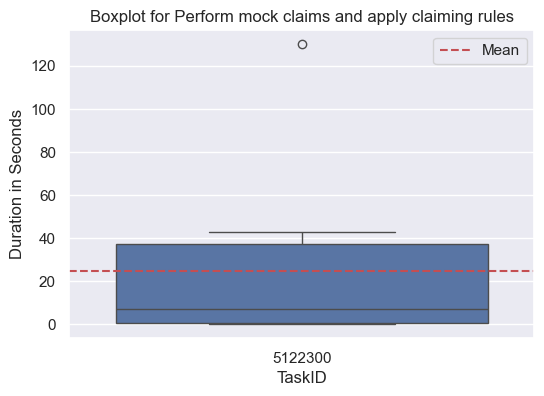

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
9,5122400,Capture auth details and click OK,512,Pre-authorization Agent,19,00:01:30.211000,90.210526,15.0,326.0,90.495291,61.0,23.5,126.5


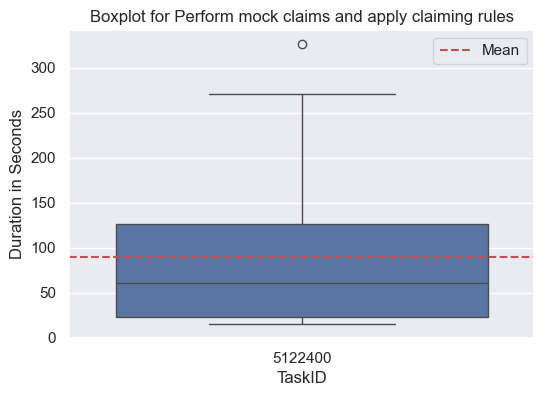

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
10,5122500,Create notes,512,Pre-authorization Agent,59,00:00:57.424000,57.423729,4.0,275.0,57.183071,38.0,15.0,78.5


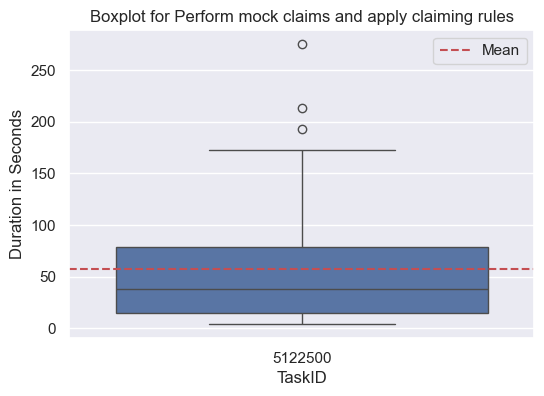

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
13,5123300,Complete the auth,5123,Pre-authorization Agent,15,00:01:34.667000,94.666667,0.0,379.0,117.537633,42.0,18.5,141.0


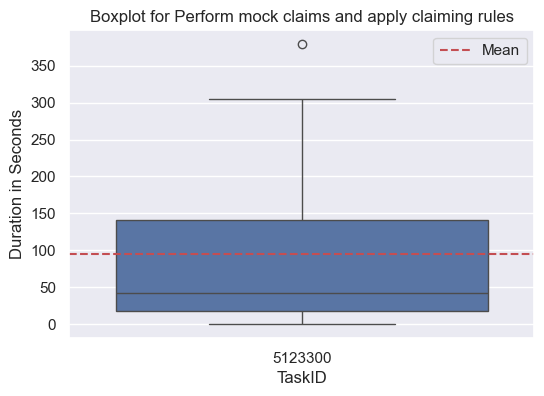

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
5,5121500,Resolve enquiry,512,Pre-authorization Agent,34,00:01:31.735000,91.735294,0.0,405.0,95.498472,62.5,23.25,136.75


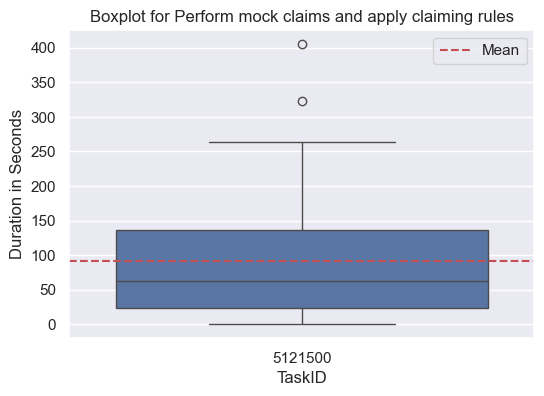

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


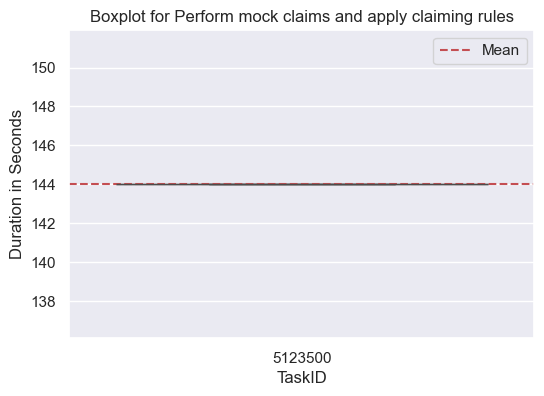

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
12,5123100,Review value of the scans and relevancy to adm...,5123,Pre-authorization Agent,2,00:00:30.500000,30.5,9.0,52.0,30.405592,30.5,19.75,41.25


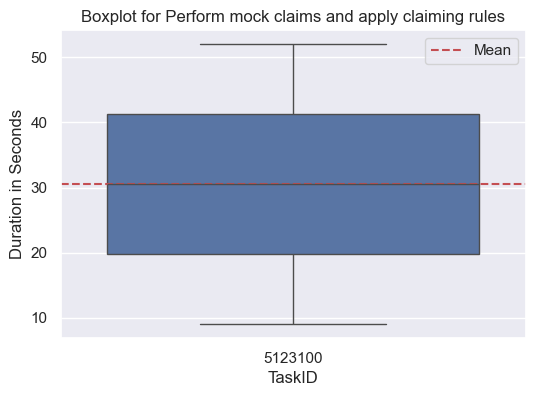

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


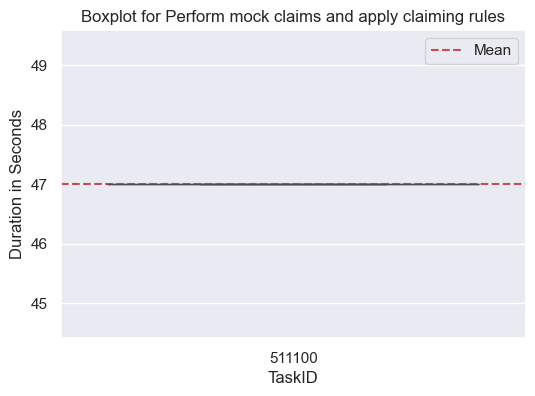

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


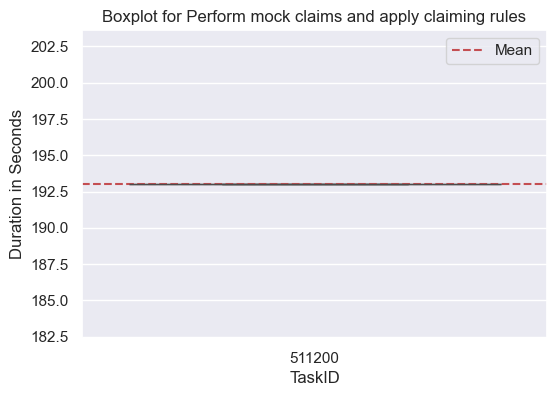

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


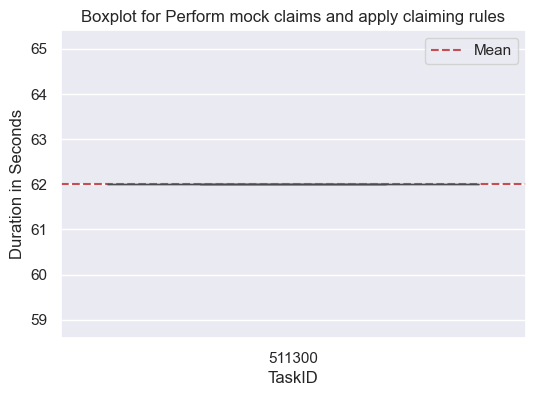

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


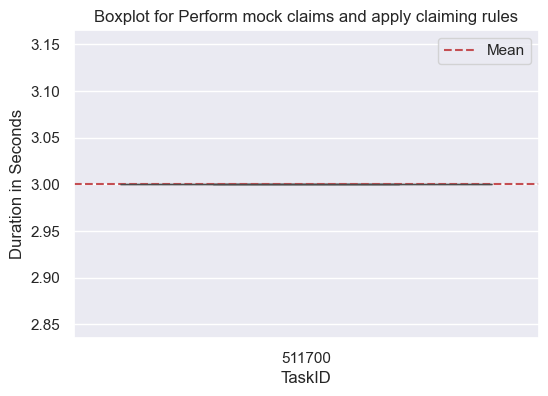

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
0,511400,Perform mock claims and apply claiming rules,511,Claims Technical Specialist,4,00:11:41.500000,701.5,371.0,927.0,235.35151,754.0,645.5,810.0


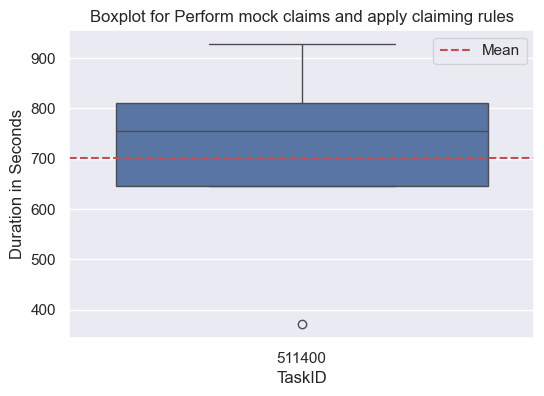

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
1,511500,Email excel quote,511,Claims Technical Specialist,4,00:05:38.250000,338.25,252.0,474.0,103.590138,313.5,260.25,391.5


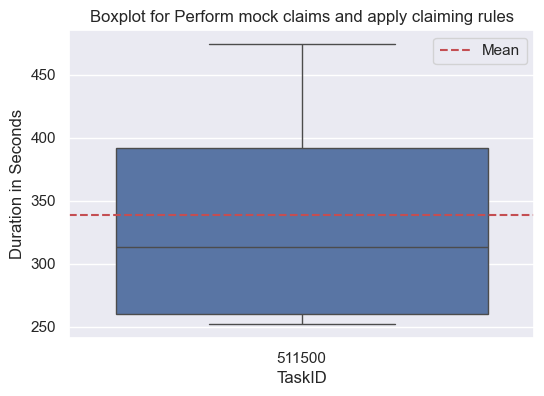

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


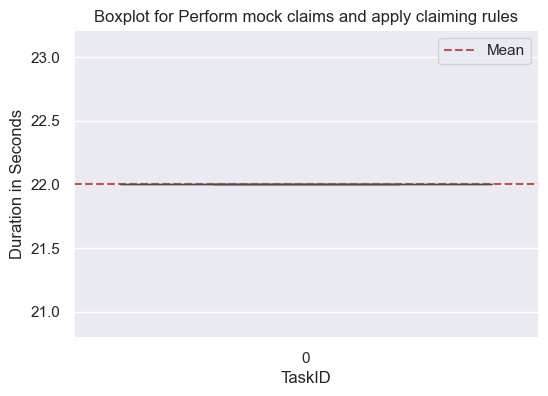

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


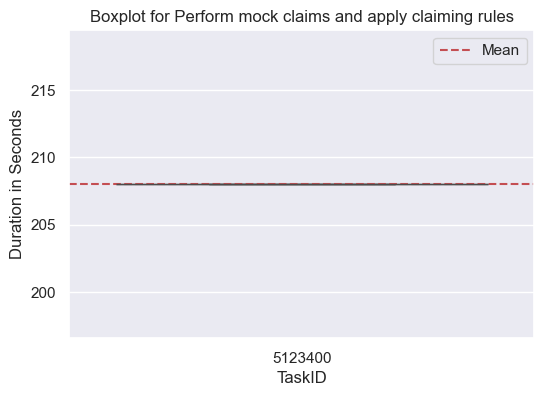

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
20,521100,Validate authorisation request,521,Pre-authorization Agent,4,00:00:16.750000,16.75,7.0,23.0,7.135592,18.5,13.75,21.5
39,521100,Validate authorisation request,521,Pre-authorization Agent,4,00:00:16.750000,16.75,7.0,23.0,7.135592,18.5,13.75,21.5


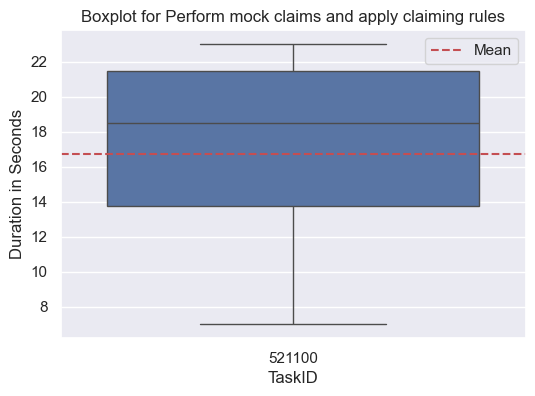

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
21,521200,Validate membership,521,Pre-authorization Agent,9,00:01:23.111000,83.111111,6.0,542.0,172.813081,21.0,18.0,47.0
40,521200,Validate membership,521,Pre-authorization Agent,9,00:01:23.111000,83.111111,6.0,542.0,172.813081,21.0,18.0,47.0


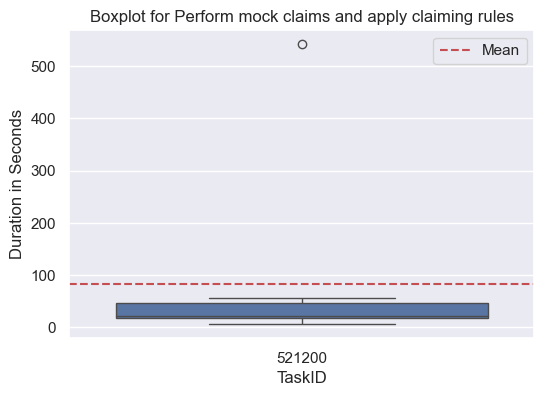

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
41,521300,Load authorisation,521,Pre-authorization Agent,9,00:04:15,255.0,79.0,431.0,132.445272,322.0,112.0,342.0


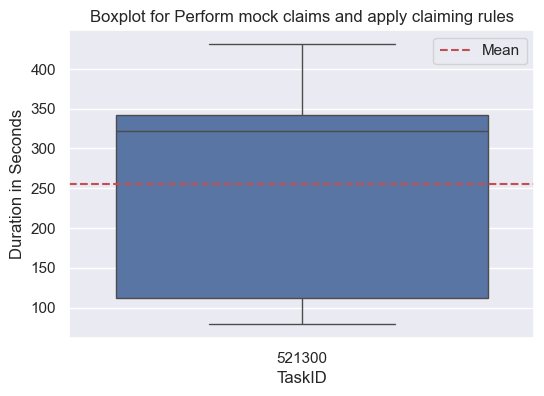

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
22,5213800,Complete auth,521,Pre-authorization Agent,9,00:00:23.889000,23.888889,0.0,56.0,18.744629,27.0,8.0,38.0


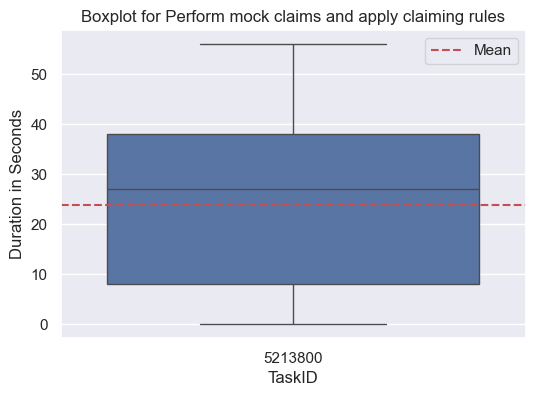

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
24,5223800,Complete auth,522,Pre-authorization Agent,4,00:00:18.500000,18.5,6.0,30.0,9.848858,19.0,15.0,22.5


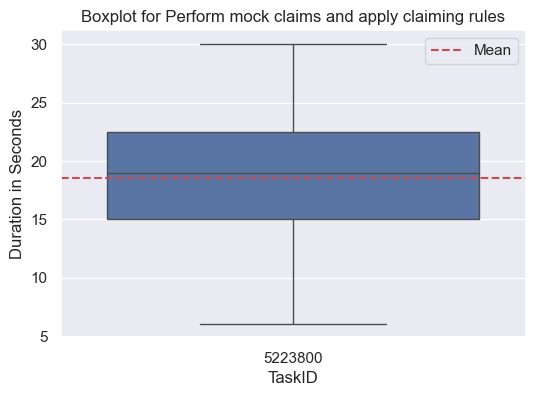

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
23,522200,Validate membership,522,Case manager,3,00:00:23.333000,23.333333,2.0,45.0,21.501938,23.0,12.5,34.0
42,522200,Validate membership,522,Pre-authorization Agent,3,00:00:23.333000,23.333333,2.0,45.0,21.501938,23.0,12.5,34.0


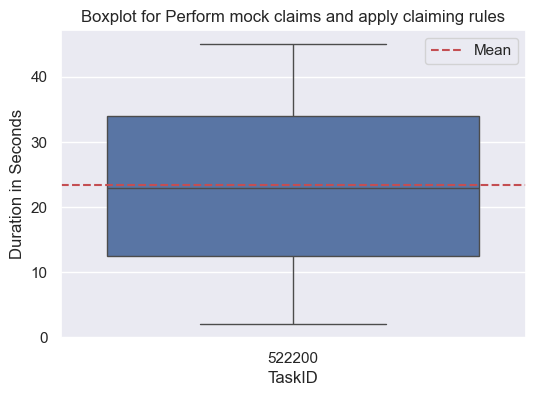

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
43,522300,Load authorisation,522,Pre-authorization Agent,6,00:05:34.833000,334.833333,255.0,427.0,58.499288,328.5,307.75,359.0


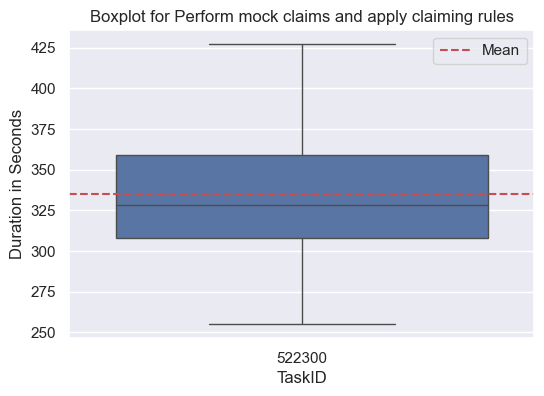

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


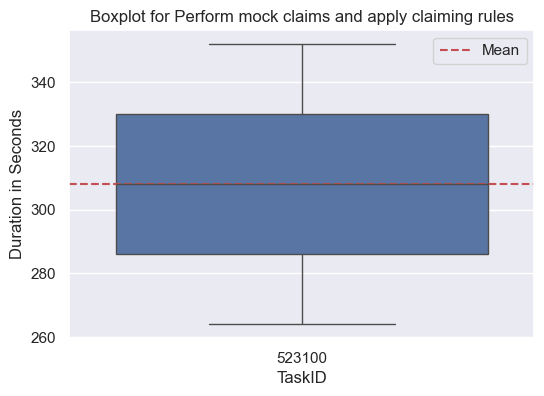

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
25,54100,Manage pre-authorisation,54,Pre-authorization Agent,2,00:10:37,637.0,441.0,833.0,277.185858,637.0,539.0,735.0


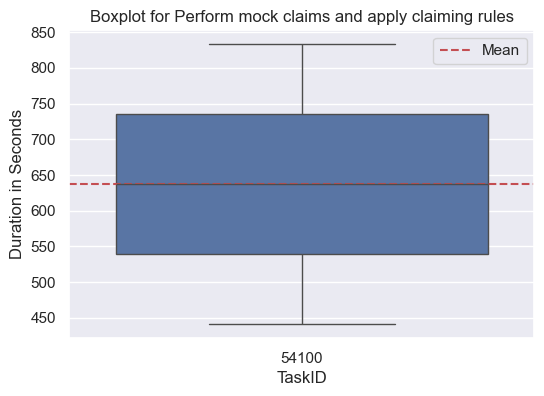

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
11,532100,Identify high cost case,532,Case manager,10,00:01:49.500000,109.5,27.0,466.0,130.500958,71.0,44.75,100.0


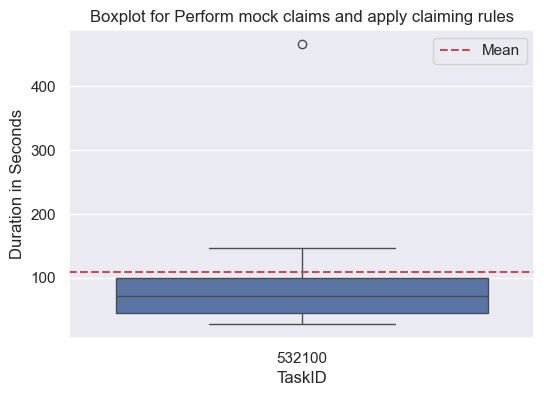

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


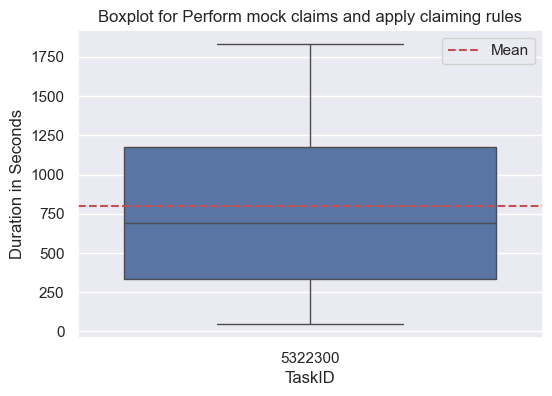

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


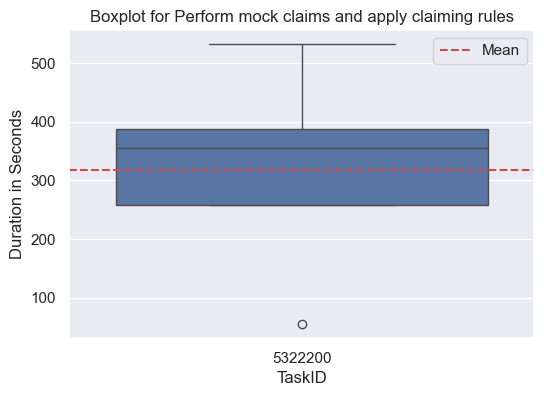

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


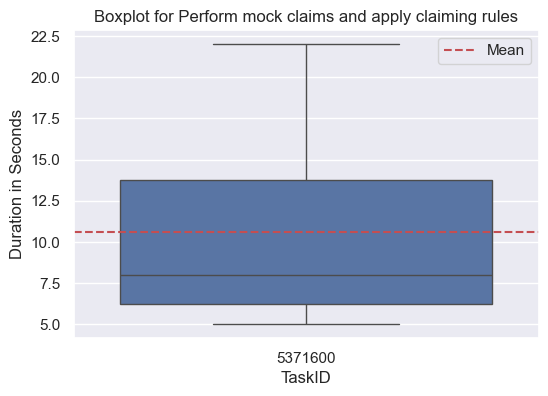

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


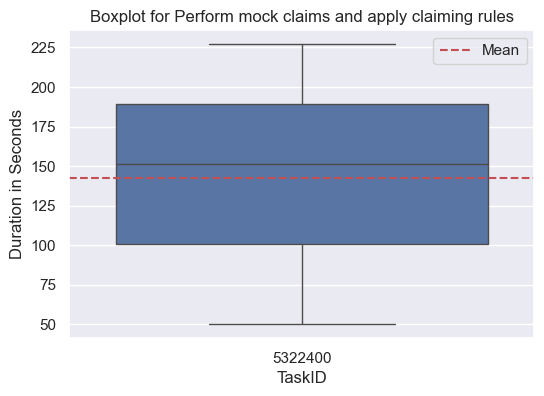

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


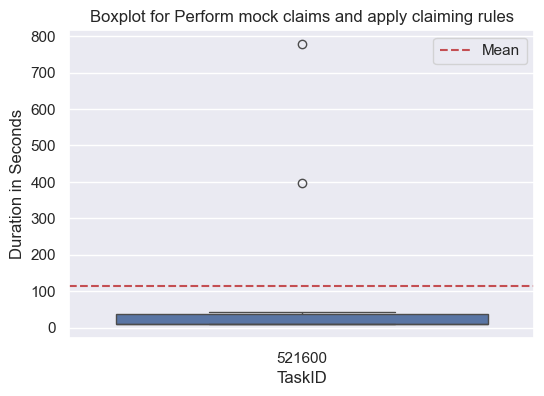

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


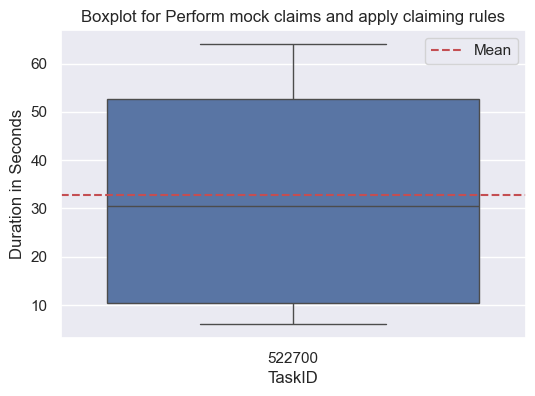

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


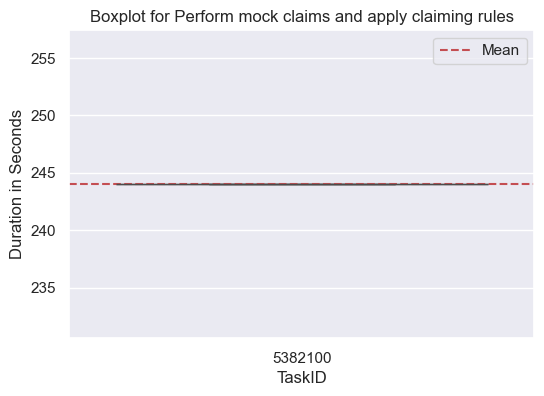

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


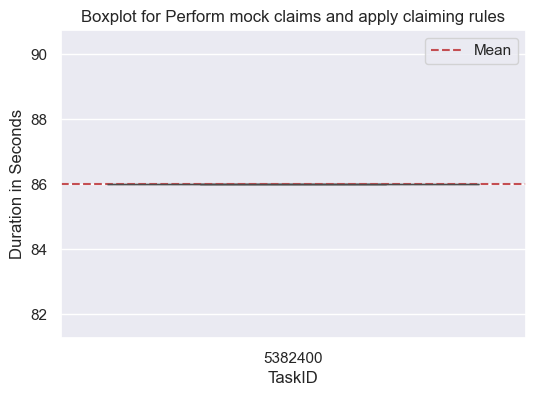

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


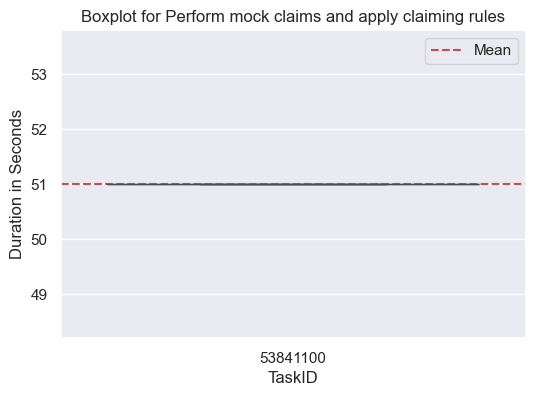

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


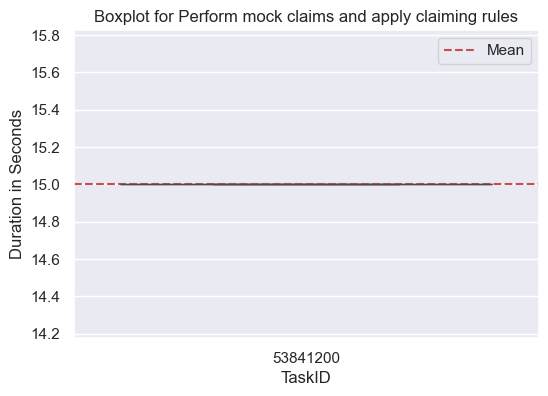

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


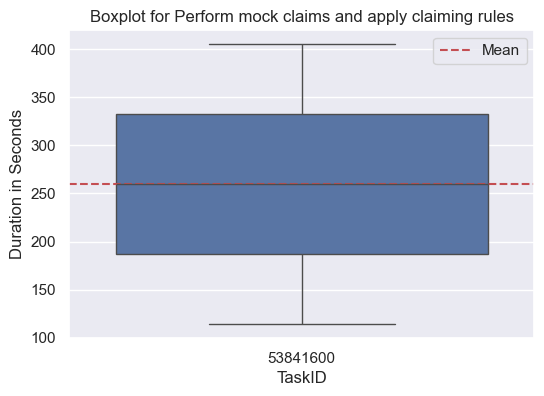

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


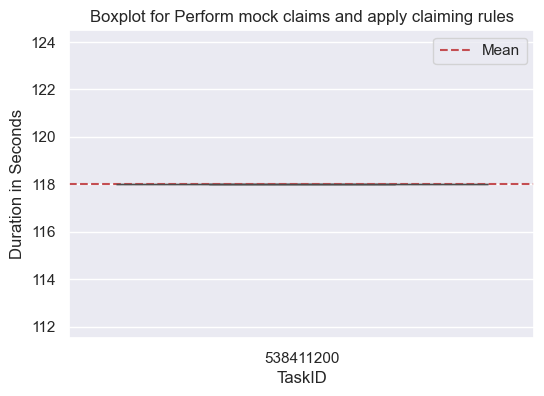

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


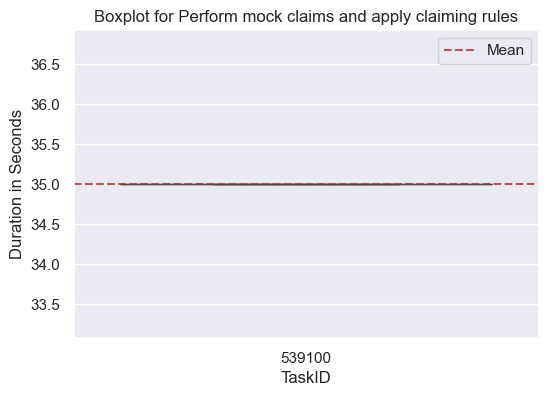

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


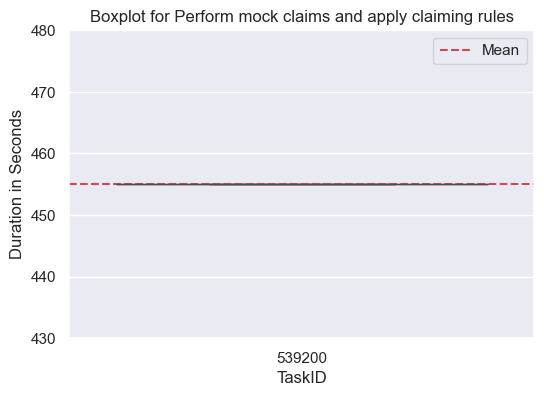

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
26,5372100,Review the authorisation report,5372,Case Manager,5,00:04:49,240.833333,25.0,951.0,358.565708,84.0,44.25,223.5


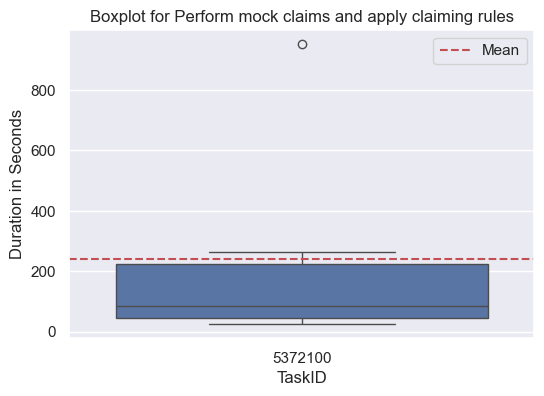

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
27,5372200,Load auth,5372,Case Manager,7,00:00:50.714000,177.5,12.0,343.0,234.052345,177.5,94.75,260.25


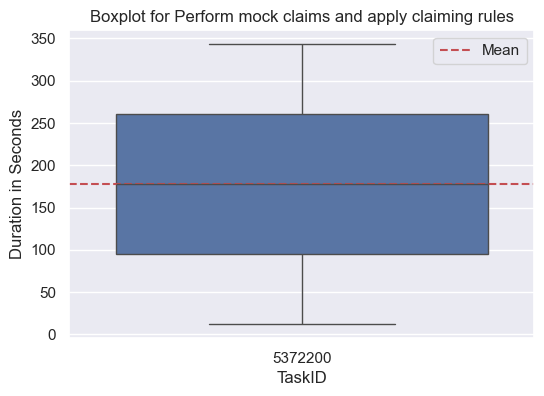

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


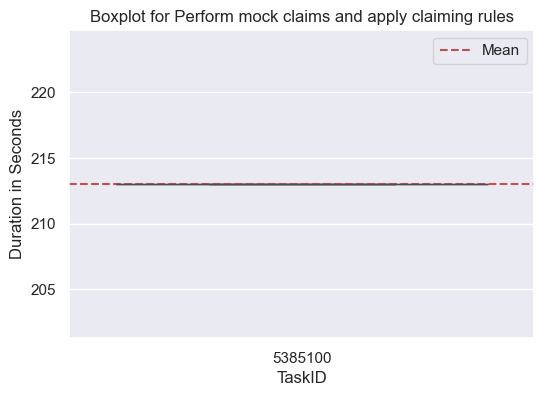

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


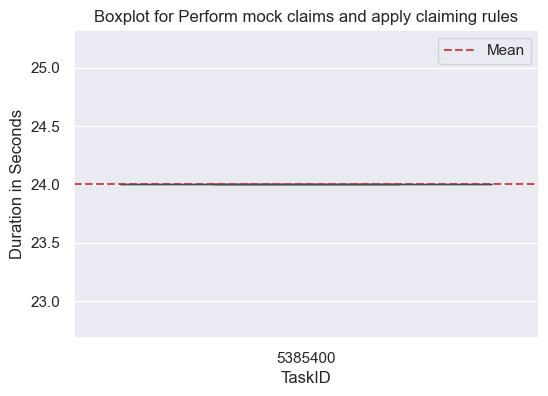

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


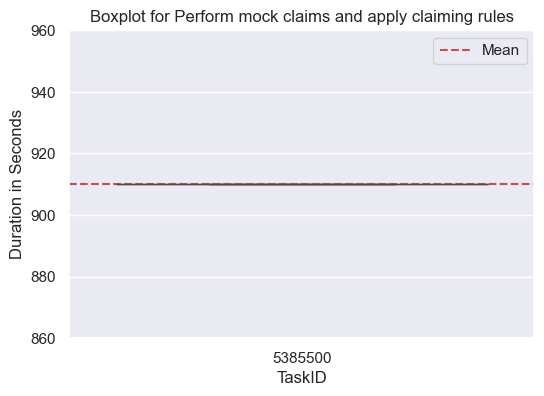

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


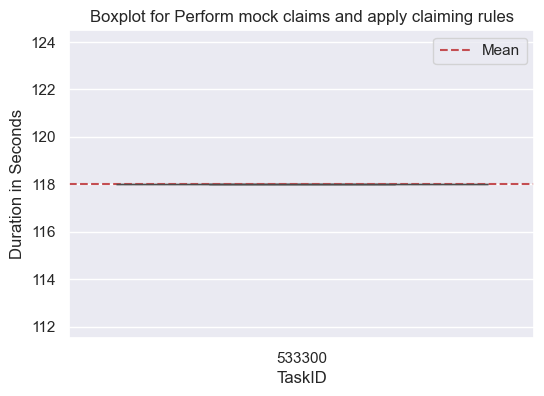

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


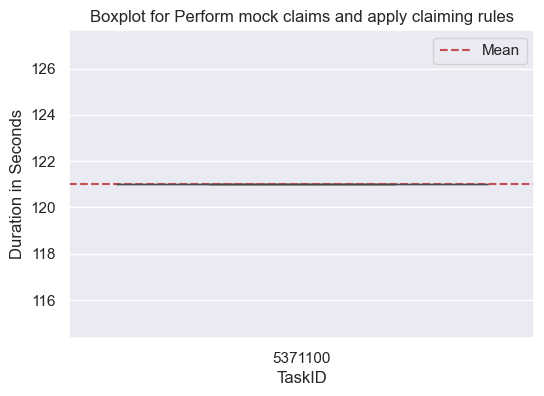

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


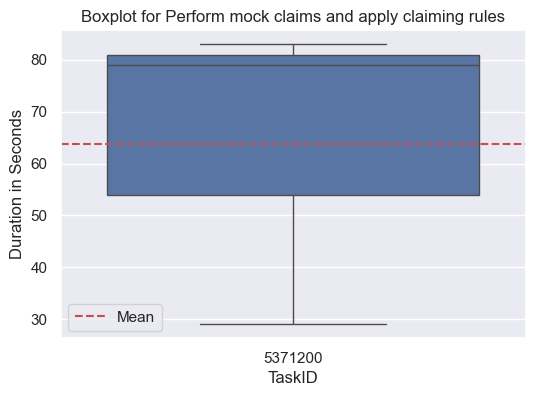

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


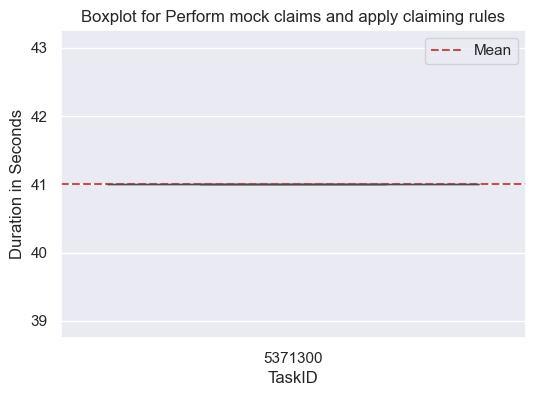

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


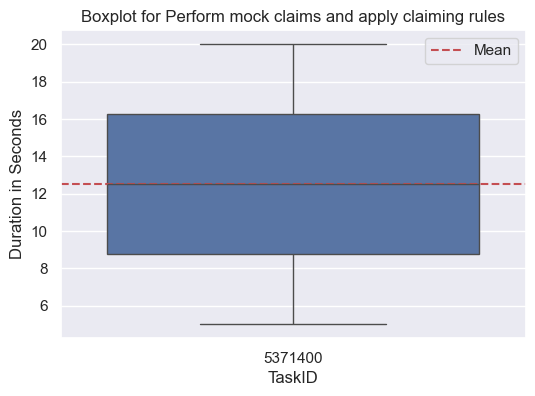

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
28,5372300,Send claim to to Claims dept for re-processing...,5372,Case Manager,3,00:06:30.667000,234.4,87.0,418.0,121.658539,213.0,187.0,267.0


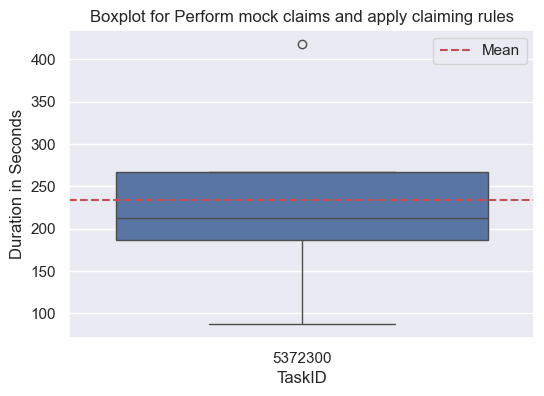

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
31,43122100,Select Insurer and type of payment run,43122,BSS Technical Specialist,5,00:00:07.400000,7.4,2.0,16.0,6.228965,4.0,3.0,12.0


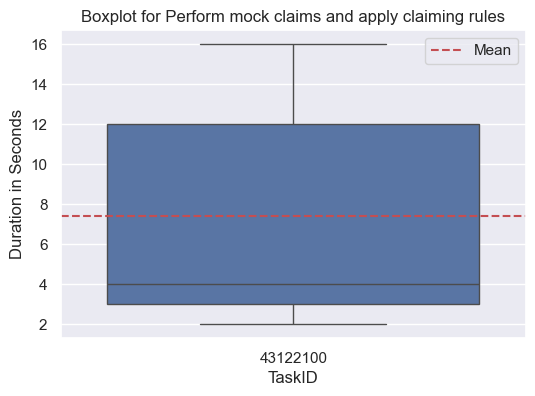

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
32,43122200,Select commence run,43122,BSS Technical Specialist,4,00:00:02.250000,2.25,1.0,3.0,0.957427,2.5,1.75,3.0


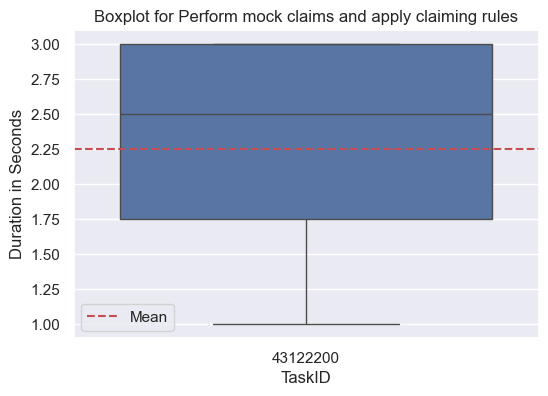

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
33,43122300,Download payrun report,43122,BSS Technical Specialist,4,00:00:26.750000,26.75,20.0,39.0,8.539126,24.0,21.5,29.25


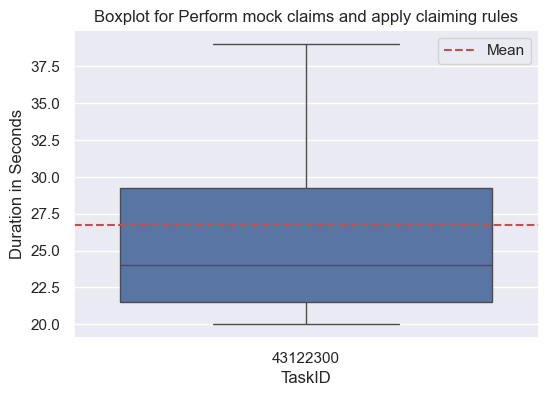

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
35,43122500,Distribute payrun report,43122,BSS Technical Specialist,4,00:00:09.750000,9.75,7.0,17.0,4.856267,7.5,7.0,10.25


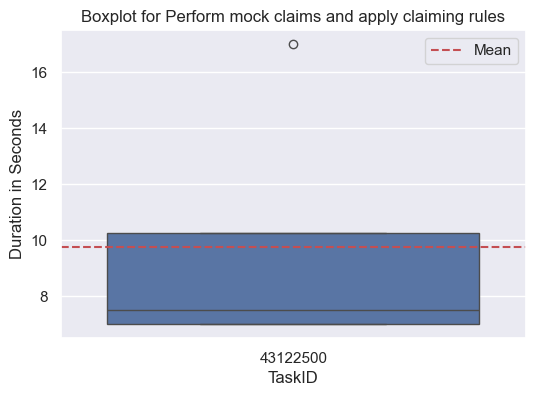

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
34,43122400,Complete workflow checklist,43122,BSS Technical Specialist,4,00:00:20.500000,20.5,17.0,29.0,5.744563,18.0,17.0,21.5


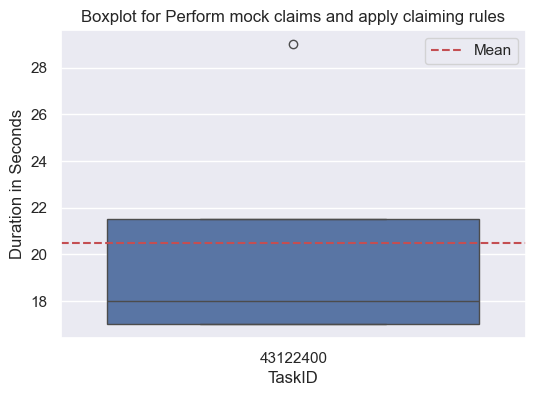

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
18,45400,Review claim control reports,45,Claims Technical Specialist,3,00:01:46.333000,106.333333,53.0,179.0,65.186911,87.0,70.0,133.0


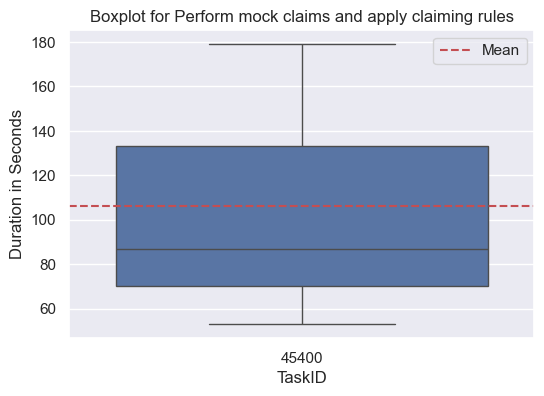

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
19,45500,Capture review notes,45,Claims Technical Specialist,3,00:00:34.333000,34.333333,18.0,47.0,14.843629,38.0,28.0,42.5


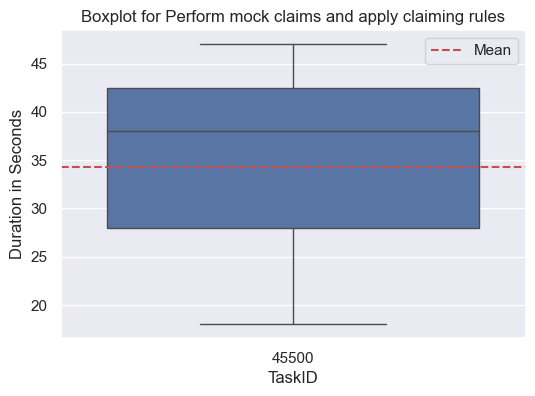

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


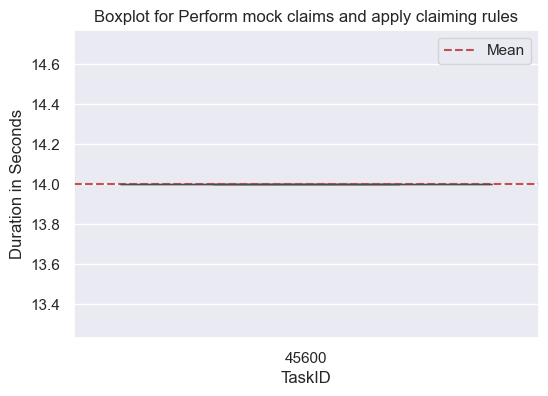

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


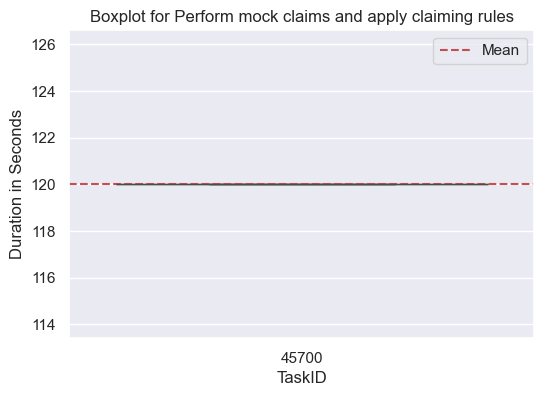

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


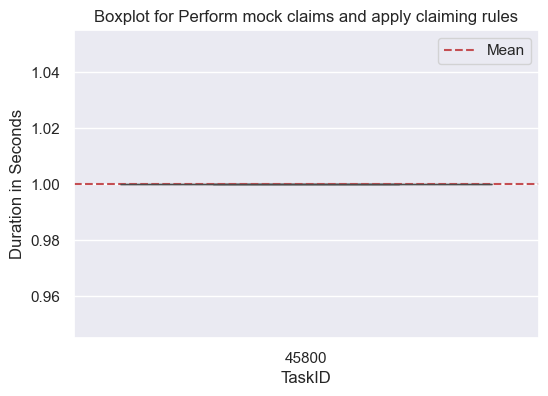

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


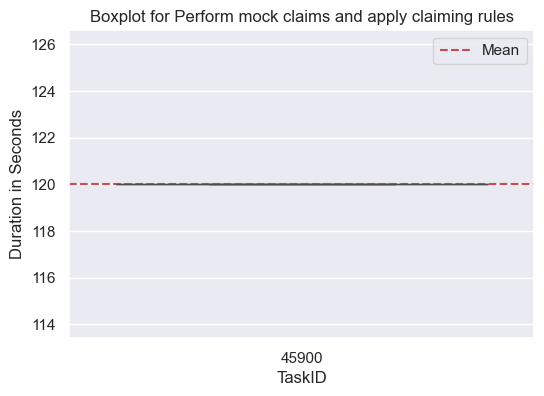

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
36,4313100,Review payrun report file,4313,BSS - Finance,4,00:01:50.500000,110.5,35.0,240.0,89.645599,83.5,64.25,129.75


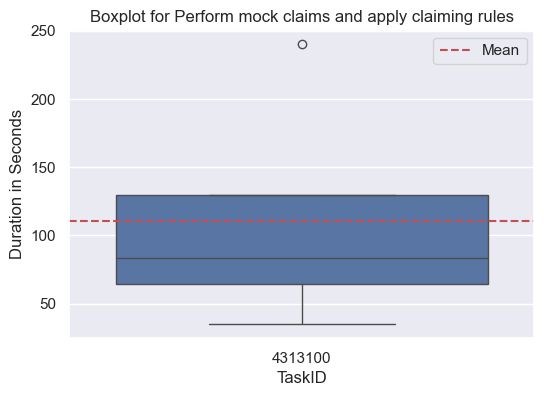

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
37,4313500,Select 'confirm' to generate ACB file,4313,BSS - Finance,4,00:00:18.250000,18.25,9.0,33.0,10.372239,15.5,12.75,21.0


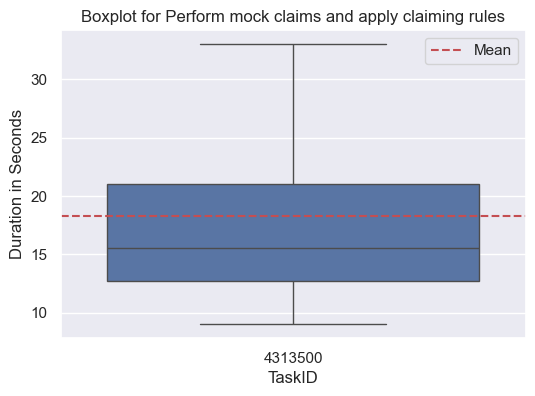

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


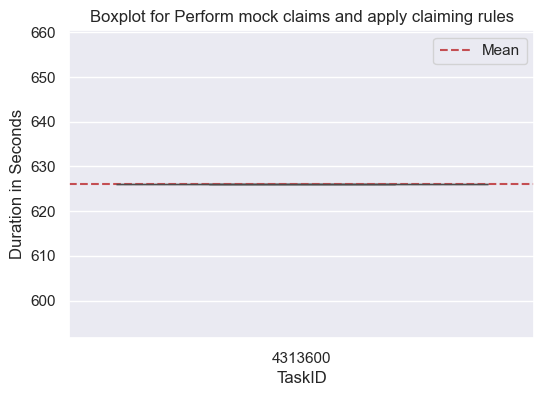

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


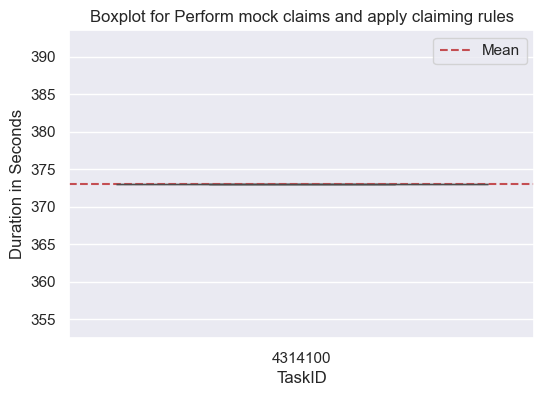

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
38,4314300,Confirm receipt of ACB file upload,4314,BSS Technical Specialist,2,00:00:26.500000,26.5,8.0,45.0,26.162951,26.5,17.25,35.75


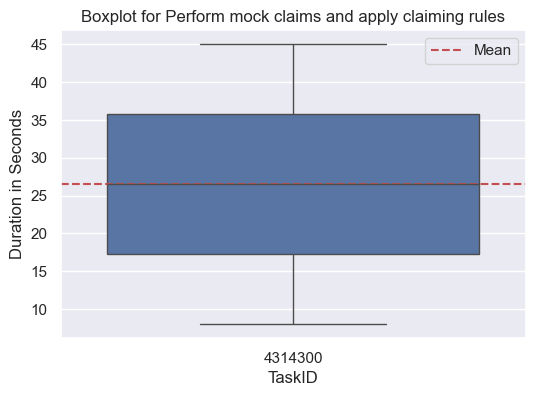

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


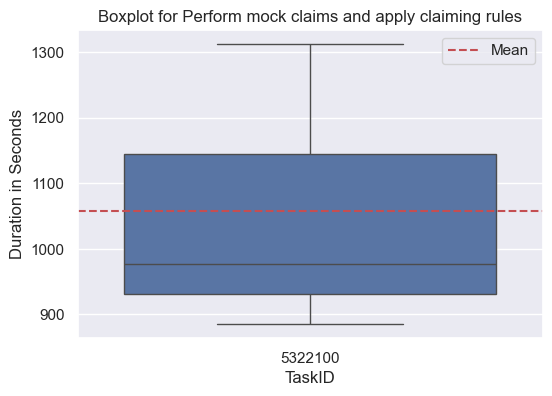

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


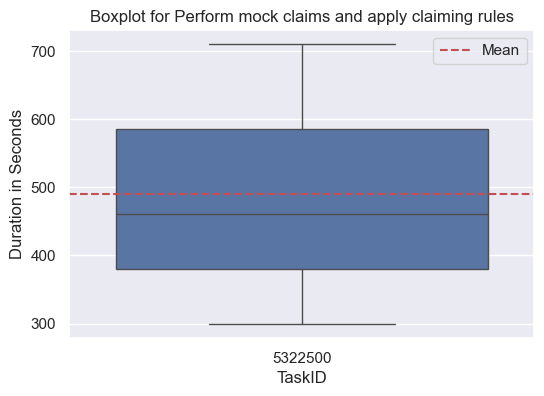

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
14,413100,Review claim & match it against indexed record...,413,Claims Assessor,36,00:01:50.472000,110.472222,21.0,373.0,81.199045,78.5,49.75,141.75


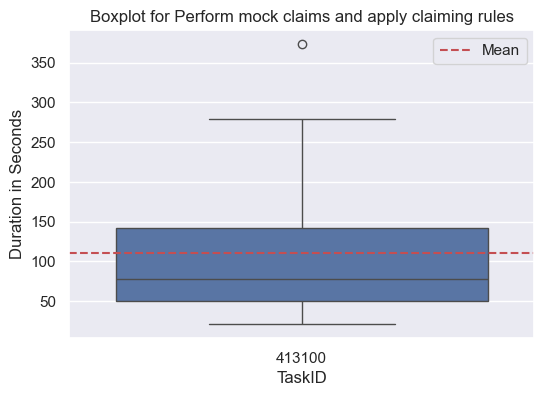

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
15,413200,Capture claim details & click Assess,413,Claims Assessor,39,00:01:55.462000,115.461538,12.0,545.0,89.606404,93.0,62.0,145.5


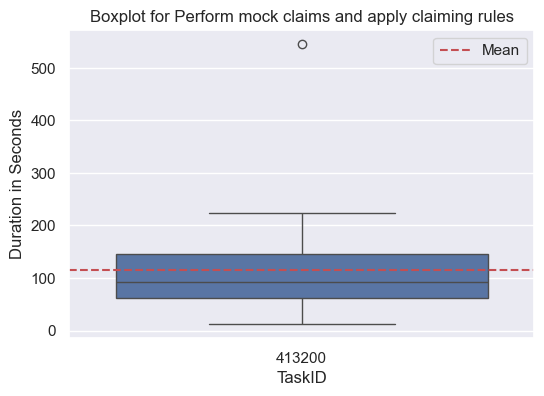

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
17,413400,Re-index work item & route to relevant dept,413,Claims Assessor,2,00:03:11,191.0,91.0,291.0,141.421356,191.0,141.0,241.0


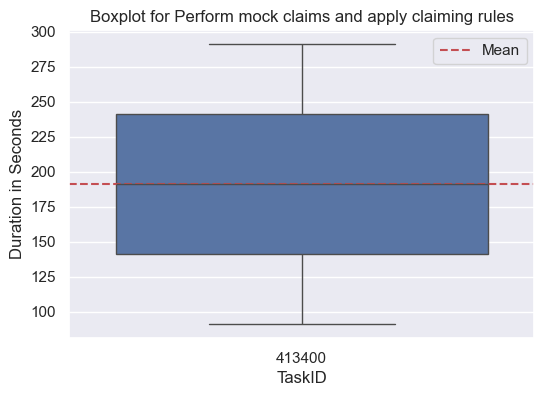

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
16,413300,Log query to client services team / relevant team,413,Claims Assessor,2,00:01:48.500000,108.5,93.0,124.0,21.92031,108.5,100.75,116.25


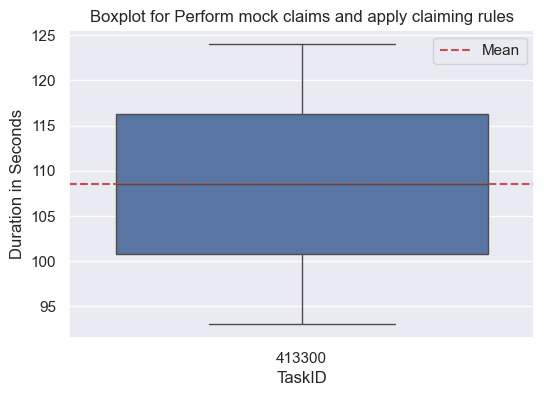

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


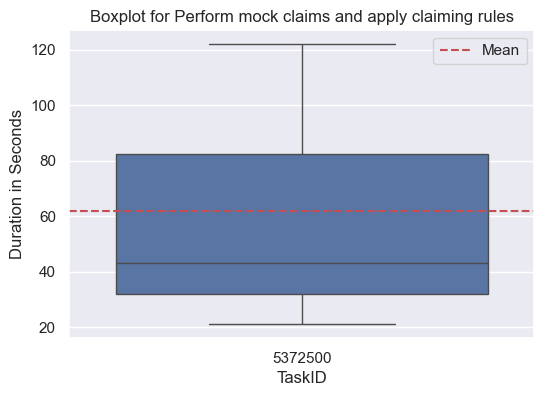

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


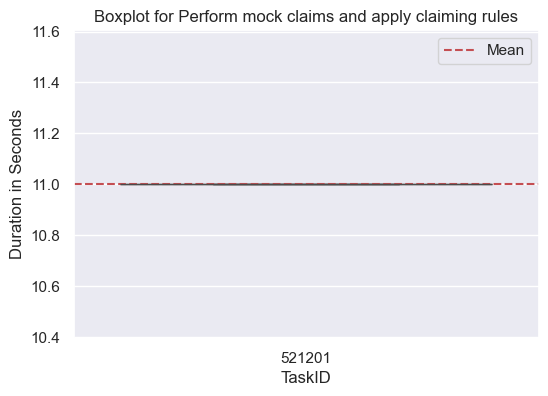

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
29,5381200,Assess case for clinical appropriateness for e...,5381,Case manager,6,00:00:18,108.0,108.0,108.0,NaN,108.0,108.0,108.0


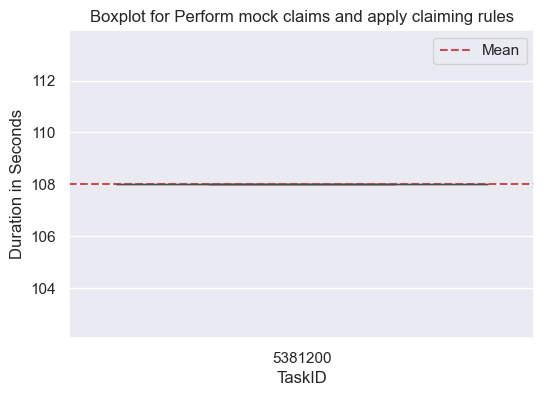

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3
30,5381300,Request motivation letter & doctor's report,5381,Case manager,2,00:04:03,486.0,486.0,486.0,NaN,486.0,486.0,486.0


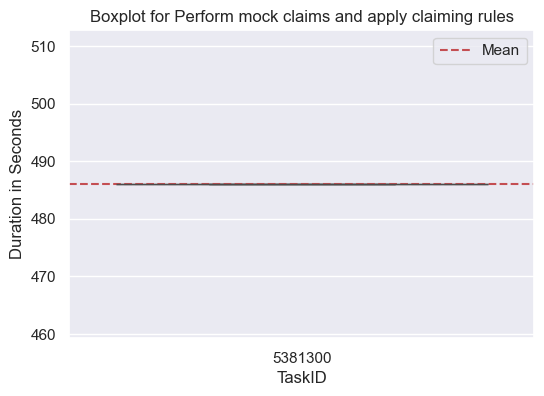

,TaskID,TaskName,ProcessID,ResponsibleRole,Iterations,AverageTaskTime,mean,min,max,std,median,q1,q3


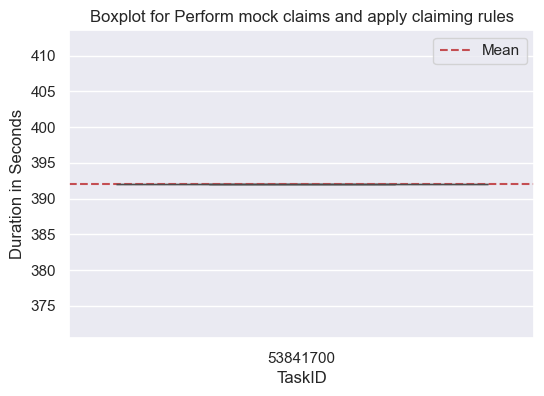

In [122]:
TaskIDs = durationData['TaskID'].unique()

for task in TaskIDs:
    plt.figure(figsize=(6, 4))
    taskDurations = durationData[durationData['TaskID'] == task]
    display(taskDataXAgg[taskDataXAgg['TaskID'] == task])

    taskName = taskDataXAgg['TaskName'].iloc[0] #extract the task name
    
    sns.boxplot(x='TaskID', y='Duration Seconds', data=taskDurations)
    plt.title(f'Boxplot for {taskName}')
    plt.xlabel('TaskID')
    plt.ylabel('Duration in Seconds')

    mean_value = taskDurations['Duration Seconds'].mean()
    plt.axhline(mean_value, color='r', linestyle='--', label='Mean')
    plt.legend()
    
    plt.savefig(f'boxplot_{task}.png')
    plt.show()